<a href="https://colab.research.google.com/github/matiasivan808/Modelo_Aprendizaje_DS_Estudio_rotaci-n_RRHH_Gaspar/blob/main/Analisis_RRHH_Rotacion_de_Personal_DSII_Gaspar_Matias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##WORKSHOP

# METADATA

1. Descripción de los datos:
El dataset incluye variables clave como nivel de satisfacción, evaluaciones de desempeño, carga horaria, historial de promociones, accidentes laborales, área de trabajo y nivel salarial. Esta diversidad de atributos permite abordar la problemática de la rotación desde una perspectiva integral y basada en evidencia. A través del análisis exploratorio y visual de los datos, se busca identificar patrones, correlaciones y factores que influyen en la decisión de los empleados de abandonar la organización. Este estudio está dirigido a profesionales y responsables del área de Recursos Humanos, analistas de datos organizacionales y líderes estratégicos, quienes podrán utilizar los hallazgos para diseñar políticas de retención más efectivas y alineadas con los perfiles y motivaciones del capital humano.

DATO: El dataset presenta modificaciones de su version original por motivos de estudio de los datos obtenidos de una empresa de Estados Unidos, a razón que el siguiente analisis aporte a la generación de un modelo de aprendizaje que pueda emplearse como referencia para un nuevo Analisis con datos reales del tipo confidencial.

Volumen: 14999 registros obtenidos de un historico de 5 años.

Source: https://www.kaggle.com/datasets/emilianito/rrhh-left


2.Diccionario de datos:
Atributo		Descripción
*  ID_empleado ----------------Identificador único
*  Nivel_de_satisfacción-------Nivel de satisfacción del empleado (0 a 1).
*  Ultima_evaluación-----------Evaluación del último desempeño (0 a 1).
*  Cantidad_proyectos----------Número de proyectos asignados al empleado.
*  Promedio_horas_mes----------Promedio de horas trabajadas por mes.
*  Años_trayectoria------------Años de permanencia en la empresa.
*  Accidente_trabajo-----------1 si tuvo un accidente laboral, 0 en caso contrario.
*  Estado_actual---------------1 si el empleado dejó la empresa, 0 si sigue activo (Variable objetivo considerada).
*  Ascenso_en_5años------------1 si fue promovido en los últimos 5 años, 0 en caso contrario.
*  Area------------------------Departamento o área de trabajo del empleado (Area Técnica, IT, RRHH, contabilidad,otros).
*  Nivel_salario---------------Nivel de salario categórico: Bajo, Medio, Alto.
*  Motivo_salida---------------Motivo de salida ("Renuncia voluntaria", "Despido", etc.).
*  Edad------------------------Edad del empleado.
*  Genero----------------------Género del empledo.
*  Tipo_contrato---------------Clasificación de contrato (Permanente, Temporal).
*  Formacion_academica---------Educación alcanzada.
*  Costo_capacitacion----------Estimación del costo en formación (USD).

# OBJETIVO ANALITICO

1. Objetivo Analítico:
Identificar y analizar los factores que influyen en la rotación del personal mediante técnicas de ciencia de datos, con el fin de anticipar riesgos de desvinculación y lograr establecer estrategias de retención de talento en la organización.

2. Contexto de la Problematica:
La rotación del personal representa un desafío crítico para muchas organizaciones, ya que implica no solo la pérdida de talento, sino también altos costos asociados al reclutamiento, formación y caída en la productividad. Tradicionalmente, los sectores o áreas de RRHH han abordado este problema desde una perspectiva reactiva, con escasa capacidad para anticipar comportamientos de salida.
Con la incorporación de la ciencia de datos, las empresas están transformando este enfoque hacia uno predictivo y basado en evidencia. Al analizar grandes volúmenes de datos históricos de empleados —como evaluaciones, trayectorias, ausentismo, desempeño, condiciones laborales o incluso factores demográficos— es posible construir modelos que identifiquen patrones comunes entre quienes abandonan la organización.

3. Hipotesis y preguntas planteadas
Existen factores internos medibles en los empleados que influyen significativamente en su decisión de abandonar la empresa.

Por consiguiente, en el intento de validar tal definición mediante las posibles relaciones que pueden existir o no de acuerdo al analisis de las distintas variables, se plantean las siguientes preguntas:

*  ¿Cuál es el perfil de satisfacción promedio de quienes permanecen vs. quienes se van?

*  ¿Los empleados con mayor carga de proyectos están más propensos a irse?

*  ¿Los empleados con mayor antigüedad tienden a permanecer más tiempo o también renuncian con frecuencia?

*  ¿Cuál es la proporción de empleados que se han ido y que nunca recibieron una promoción?

*  ¿Cómo varía la rotación según el nivel salarial? ¿Se van más empleados con sueldos bajos?

*  ¿Hay áreas/departamentos con tasas de rotación más altas que otras?

# Importación de Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
!gdown 1O44KEqEsLrTXDfL_CcyL5xX5xUAmcXlDfww1L_qwxss

#https://docs.google.com/spreadsheets/d/1O44KEqEsLrTXDfL_CcyL5xX5xUAmcXlDfww1L_qwxss/edit?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1O44KEqEsLrTXDfL_CcyL5xX5xUAmcXlDfww1L_qwxss
From (redirected): https://docs.google.com/spreadsheets/d/1O44KEqEsLrTXDfL_CcyL5xX5xUAmcXlDfww1L_qwxss/export?format=xlsx
To: /content/Dataset_rrhh_analisis.xlsx
1.16MB [00:00, 6.73MB/s]


# Visualización del Dataset

In [27]:
df = pd.read_excel('Dataset_rrhh_analisis.xlsx')
df.head()

,ID_empleado,Nivel_de_satisfacción,Ultima_evaluación,Cantidad_proyectos,Promedio_horas_mes,Años_trayectoria,Accidente_trabajo,Estado_actual,Ascenso_en_5años,Area,Nivel_salario,Edad,Genero,Tipo_contrato,Formacion_academica,Costo_capacitacion,Motivo_salida
0,E00001,0.38,0.53,2,157,3,0,1,0,ventas,Bajo,44,Femenino,NaN,Universitaria,3045.87,NaN
1,E00002,0.80,0.86,5,262,6,0,1,0,ventas,Medio,59,Femenino,Permanente,Estudios secundarios,32.80,NaN
2,E00003,0.11,0.88,7,272,4,0,1,0,ventas,Medio,53,Femenino,Permanente,Licenciatura,4112.91,NaN
3,E00004,0.72,0.87,5,223,5,0,1,0,ventas,Bajo,39,Masculino,Temporal,Licenciatura,1173.66,NaN
4,E00005,0.37,0.52,2,159,3,0,1,0,ventas,Bajo,22,Masculino,Permanente,Tecnicatura,3604.58,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_empleado            14999 non-null  object 
 1   Nivel_de_satisfacción  14999 non-null  float64
 2   Ultima_evaluación      14999 non-null  float64
 3   Cantidad_proyectos     14999 non-null  int64  
 4   Promedio_horas_mes     14999 non-null  int64  
 5   Años_trayectoria       14999 non-null  int64  
 6   Accidente_trabajo      14999 non-null  int64  
 7   Estado_actual          14999 non-null  int64  
 8   Ascenso_en_5años       14999 non-null  int64  
 9   Area                   14999 non-null  object 
 10  Nivel_salario          14999 non-null  object 
 11  Edad                   14999 non-null  int64  
 12  Genero                 14999 non-null  object 
 13  Tipo_contrato          10047 non-null  object 
 14  Formacion_academica    14999 non-null  object 
 15  Co

In [29]:
df.describe()

,Nivel_de_satisfacción,Ultima_evaluación,Cantidad_proyectos,Promedio_horas_mes,Años_trayectoria,Accidente_trabajo,Estado_actual,Ascenso_en_5años,Edad,Costo_capacitacion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,40.616974,2506.077585
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,11.505469,1439.745913
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,21.000000,0.040000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,31.000000,1271.485000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,41.000000,2511.800000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,51.000000,3761.830000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,60.000000,4999.700000


In [30]:
df.tail()

,ID_empleado,Nivel_de_satisfacción,Ultima_evaluación,Cantidad_proyectos,Promedio_horas_mes,Años_trayectoria,Accidente_trabajo,Estado_actual,Ascenso_en_5años,Area,Nivel_salario,Edad,Genero,Tipo_contrato,Formacion_academica,Costo_capacitacion,Motivo_salida
14994,E14995,0.40,0.57,2,151,3,0,1,0,Area de apoyo,Bajo,36,Femenino,NaN,Estudios secundarios,3635.81,NaN
14995,E14996,0.37,0.48,2,160,3,0,1,0,Area de apoyo,Bajo,33,Masculino,NaN,Universitaria,4365.07,NaN
14996,E14997,0.37,0.53,2,143,3,0,1,0,Area de apoyo,Bajo,28,Masculino,Temporal,Estudios secundarios,1426.50,NaN
14997,E14998,0.11,0.96,6,280,4,0,1,0,Area de apoyo,Bajo,45,Masculino,Temporal,Estudios secundarios,918.03,NaN
14998,E14999,0.37,0.52,2,158,3,0,1,0,Area de apoyo,Bajo,22,Femenino,Temporal,Licenciatura,4921.70,NaN


In [31]:
df.shape

(14999, 17)

**Chequeo de nulos**

In [32]:
df.isnull().sum()

,0
ID_empleado,0
Nivel_de_satisfacción,0
Ultima_evaluación,0
Cantidad_proyectos,0
Promedio_horas_mes,0
Años_trayectoria,0
Accidente_trabajo,0
Estado_actual,0
Ascenso_en_5años,0
Area,0


In [33]:
#Forma alternativa
def nulos(df):
  cant = len(df)
  for col in df.columns:
    print(col,':',round(df[col].isnull().sum()*100 / cant,2),'%')

nulos(df)

ID_empleado : 0.0 %
Nivel_de_satisfacción : 0.0 %
Ultima_evaluación : 0.0 %
Cantidad_proyectos : 0.0 %
Promedio_horas_mes : 0.0 %
Años_trayectoria : 0.0 %
Accidente_trabajo : 0.0 %
Estado_actual : 0.0 %
Ascenso_en_5años : 0.0 %
Area : 0.0 %
Nivel_salario : 0.0 %
Edad : 0.0 %
Genero : 0.0 %
Tipo_contrato : 33.02 %
Formacion_academica : 0.0 %
Costo_capacitacion : 0.0 %
Motivo_salida : 23.81 %


**Manipulación de datos**

In [34]:
df[df['Tipo_contrato'].isnull()]

,ID_empleado,Nivel_de_satisfacción,Ultima_evaluación,Cantidad_proyectos,Promedio_horas_mes,Años_trayectoria,Accidente_trabajo,Estado_actual,Ascenso_en_5años,Area,Nivel_salario,Edad,Genero,Tipo_contrato,Formacion_academica,Costo_capacitacion,Motivo_salida
0,E00001,0.38,0.53,2,157,3,0,1,0,ventas,Bajo,44,Femenino,NaN,Universitaria,3045.87,NaN
8,E00009,0.89,1.00,5,224,5,0,1,0,ventas,Bajo,23,Femenino,NaN,Licenciatura,1338.70,NaN
10,E00011,0.45,0.54,2,135,3,0,1,0,ventas,Bajo,55,Femenino,NaN,Licenciatura,2404.02,NaN
15,E00016,0.38,0.54,2,143,3,0,1,0,ventas,Bajo,21,Femenino,NaN,Estudios secundarios,3619.58,NaN
23,E00024,0.46,0.57,2,139,3,0,1,0,ventas,Bajo,28,Femenino,NaN,Tecnicatura,1777.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,E14986,0.91,0.99,5,254,5,0,1,0,Area técnica,Medio,49,Masculino,NaN,Tecnicatura,549.69,NaN
14992,E14993,0.40,0.48,2,155,3,0,1,0,Area de apoyo,Bajo,24,Femenino,NaN,Estudios secundarios,2847.57,NaN
14993,E14994,0.76,0.83,6,293,6,0,1,0,Area de apoyo,Bajo,48,Masculino,NaN,Tecnicatura,2490.46,NaN
14994,E14995,0.40,0.57,2,151,3,0,1,0,Area de apoyo,Bajo,36,Femenino,NaN,Estudios secundarios,3635.81,NaN


In [35]:
#Transformación y Reemplazo de Nulos por valor
df['Tipo_contrato'] = df['Tipo_contrato'].fillna('Contrato plazo fijo')

In [36]:
df[df['Tipo_contrato']== 'Contrato plazo fijo']

,ID_empleado,Nivel_de_satisfacción,Ultima_evaluación,Cantidad_proyectos,Promedio_horas_mes,Años_trayectoria,Accidente_trabajo,Estado_actual,Ascenso_en_5años,Area,Nivel_salario,Edad,Genero,Tipo_contrato,Formacion_academica,Costo_capacitacion,Motivo_salida
0,E00001,0.38,0.53,2,157,3,0,1,0,ventas,Bajo,44,Femenino,Contrato plazo fijo,Universitaria,3045.87,NaN
8,E00009,0.89,1.00,5,224,5,0,1,0,ventas,Bajo,23,Femenino,Contrato plazo fijo,Licenciatura,1338.70,NaN
10,E00011,0.45,0.54,2,135,3,0,1,0,ventas,Bajo,55,Femenino,Contrato plazo fijo,Licenciatura,2404.02,NaN
15,E00016,0.38,0.54,2,143,3,0,1,0,ventas,Bajo,21,Femenino,Contrato plazo fijo,Estudios secundarios,3619.58,NaN
23,E00024,0.46,0.57,2,139,3,0,1,0,ventas,Bajo,28,Femenino,Contrato plazo fijo,Tecnicatura,1777.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,E14986,0.91,0.99,5,254,5,0,1,0,Area técnica,Medio,49,Masculino,Contrato plazo fijo,Tecnicatura,549.69,NaN
14992,E14993,0.40,0.48,2,155,3,0,1,0,Area de apoyo,Bajo,24,Femenino,Contrato plazo fijo,Estudios secundarios,2847.57,NaN
14993,E14994,0.76,0.83,6,293,6,0,1,0,Area de apoyo,Bajo,48,Masculino,Contrato plazo fijo,Tecnicatura,2490.46,NaN
14994,E14995,0.40,0.57,2,151,3,0,1,0,Area de apoyo,Bajo,36,Femenino,Contrato plazo fijo,Estudios secundarios,3635.81,NaN


In [37]:
df.isnull().sum()

,0
ID_empleado,0
Nivel_de_satisfacción,0
Ultima_evaluación,0
Cantidad_proyectos,0
Promedio_horas_mes,0
Años_trayectoria,0
Accidente_trabajo,0
Estado_actual,0
Ascenso_en_5años,0
Area,0


In [38]:
df[df['Motivo_salida'].isnull()]

,ID_empleado,Nivel_de_satisfacción,Ultima_evaluación,Cantidad_proyectos,Promedio_horas_mes,Años_trayectoria,Accidente_trabajo,Estado_actual,Ascenso_en_5años,Area,Nivel_salario,Edad,Genero,Tipo_contrato,Formacion_academica,Costo_capacitacion,Motivo_salida
0,E00001,0.38,0.53,2,157,3,0,1,0,ventas,Bajo,44,Femenino,Contrato plazo fijo,Universitaria,3045.87,NaN
1,E00002,0.80,0.86,5,262,6,0,1,0,ventas,Medio,59,Femenino,Permanente,Estudios secundarios,32.80,NaN
2,E00003,0.11,0.88,7,272,4,0,1,0,ventas,Medio,53,Femenino,Permanente,Licenciatura,4112.91,NaN
3,E00004,0.72,0.87,5,223,5,0,1,0,ventas,Bajo,39,Masculino,Temporal,Licenciatura,1173.66,NaN
4,E00005,0.37,0.52,2,159,3,0,1,0,ventas,Bajo,22,Masculino,Permanente,Tecnicatura,3604.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,E14995,0.40,0.57,2,151,3,0,1,0,Area de apoyo,Bajo,36,Femenino,Contrato plazo fijo,Estudios secundarios,3635.81,NaN
14995,E14996,0.37,0.48,2,160,3,0,1,0,Area de apoyo,Bajo,33,Masculino,Contrato plazo fijo,Universitaria,4365.07,NaN
14996,E14997,0.37,0.53,2,143,3,0,1,0,Area de apoyo,Bajo,28,Masculino,Temporal,Estudios secundarios,1426.50,NaN
14997,E14998,0.11,0.96,6,280,4,0,1,0,Area de apoyo,Bajo,45,Masculino,Temporal,Estudios secundarios,918.03,NaN


In [39]:
df['Motivo_salida'] = df['Motivo_salida'].fillna('S/M_En Actividad')

In [40]:
df[df['Motivo_salida']== 'S/M_En Actividad']

,ID_empleado,Nivel_de_satisfacción,Ultima_evaluación,Cantidad_proyectos,Promedio_horas_mes,Años_trayectoria,Accidente_trabajo,Estado_actual,Ascenso_en_5años,Area,Nivel_salario,Edad,Genero,Tipo_contrato,Formacion_academica,Costo_capacitacion,Motivo_salida
0,E00001,0.38,0.53,2,157,3,0,1,0,ventas,Bajo,44,Femenino,Contrato plazo fijo,Universitaria,3045.87,S/M_En Actividad
1,E00002,0.80,0.86,5,262,6,0,1,0,ventas,Medio,59,Femenino,Permanente,Estudios secundarios,32.80,S/M_En Actividad
2,E00003,0.11,0.88,7,272,4,0,1,0,ventas,Medio,53,Femenino,Permanente,Licenciatura,4112.91,S/M_En Actividad
3,E00004,0.72,0.87,5,223,5,0,1,0,ventas,Bajo,39,Masculino,Temporal,Licenciatura,1173.66,S/M_En Actividad
4,E00005,0.37,0.52,2,159,3,0,1,0,ventas,Bajo,22,Masculino,Permanente,Tecnicatura,3604.58,S/M_En Actividad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,E14995,0.40,0.57,2,151,3,0,1,0,Area de apoyo,Bajo,36,Femenino,Contrato plazo fijo,Estudios secundarios,3635.81,S/M_En Actividad
14995,E14996,0.37,0.48,2,160,3,0,1,0,Area de apoyo,Bajo,33,Masculino,Contrato plazo fijo,Universitaria,4365.07,S/M_En Actividad
14996,E14997,0.37,0.53,2,143,3,0,1,0,Area de apoyo,Bajo,28,Masculino,Temporal,Estudios secundarios,1426.50,S/M_En Actividad
14997,E14998,0.11,0.96,6,280,4,0,1,0,Area de apoyo,Bajo,45,Masculino,Temporal,Estudios secundarios,918.03,S/M_En Actividad


In [43]:
df.isnull().sum()

,0
ID_empleado,0
Nivel_de_satisfacción,0
Ultima_evaluación,0
Cantidad_proyectos,0
Promedio_horas_mes,0
Años_trayectoria,0
Accidente_trabajo,0
Estado_actual,0
Ascenso_en_5años,0
Area,0


# EDA - Analisis exploratorio de Datos

A continuación, con el propósito de dar respuesta a los cuestionamientos iniciales, se propone profundizar en los siguientes puntos:
*  Comparar perfiles entre empleados activos y desvinculados: Mediante el análisis de la variable "Estado_actual", para visualizar diferencias entre quienes permanecen y quienes han salido de la organización, detectando posibles factores de riesgo.
*  Explorar variables clave asociadas al desempeño: Se pueden analizar campos como "Nivel_de_satisfacción" o "Cantidad_proyectos" para detectar condiciones laborales que preceden a la rotación.
*  Conocer el perfil de la plantilla laboral: Caracterizar a los empleados en términos de edad, tipo de contrato y antigüedad, lo que ayuda a establecer patrones demográficos vinculados con la retención o desvinculación.

In [45]:
cant_en_actividad = df['Estado_actual'].value_counts()
cant_en_actividad

,count
Estado_actual,
0,11428
1,3571


In [47]:
cant_por_area = df['Area'].value_counts()
cant_por_area

,count
Area,
ventas,4140
Area técnica,2720
Area de apoyo,2229
Sector IT,1227
Producción,902
marketing,858
Investigación y Desarrollo,787
contabilidad,767
recursos humanos,739


In [48]:
cant_estado_por_area = df.groupby('Area')['Estado_actual'].value_counts()
cant_estado_por_area

Area                        Estado_actual
Area de apoyo               0                1674
                            1                 555
Area técnica                0                2023
                            1                 697
Investigación y Desarrollo  0                 666
                            1                 121
Producción                  0                 704
                            1                 198
Sector IT                   0                 954
                            1                 273
administración              0                 539
                            1                  91
contabilidad                0                 563
                            1                 204
marketing                   0                 655
                            1                 203
recursos humanos            0                 524
                            1                 215
ventas                      0                3126
                            1                1014
Name: count, dtype: int64

In [49]:
cant_por_sueldo = df.groupby('Nivel_salario')['Estado_actual'].value_counts()
cant_por_sueldo

Nivel_salario  Estado_actual
Alto           0                1155
               1                  82
Bajo           0                5144
               1                2172
Medio          0                5129
               1                1317
Name: count, dtype: int64

In [50]:
cant_por_sueldo = df.groupby('Cantidad_proyectos')['Estado_actual'].value_counts()
cant_por_sueldo

Cantidad_proyectos  Estado_actual
2                   1                1567
                    0                 821
3                   0                3983
                    1                  72
4                   0                3956
                    1                 409
5                   0                2149
                    1                 612
6                   1                 655
                    0                 519
7                   1                 256
Name: count, dtype: int64

In [58]:
cant_inactivo_por_motivo = df.groupby('Motivo_salida')['Estado_actual'].value_counts()
cant_inactivo_por_motivo

,,count
Motivo_salida,Estado_actual,
Contrato finalizado,0,2358
Despido,0,2286
Jubilación,0,60
Reestructuración,0,2258
Renuncia voluntaria,0,4466
S/M_En Actividad,1,3571


# Gráficos de Datos

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Estado_actual'>

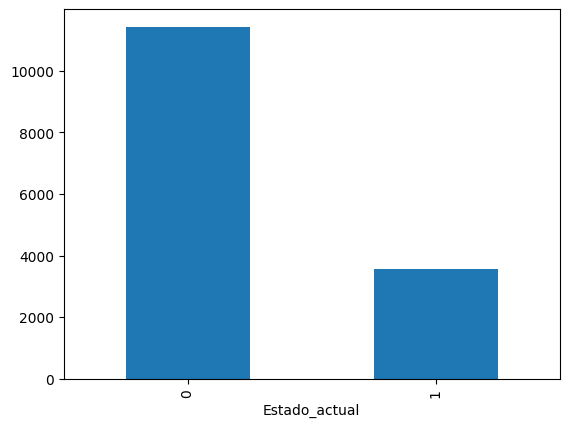

In [52]:
df['Estado_actual'].value_counts().plot.bar()

<Axes: xlabel='Area,Estado_actual'>

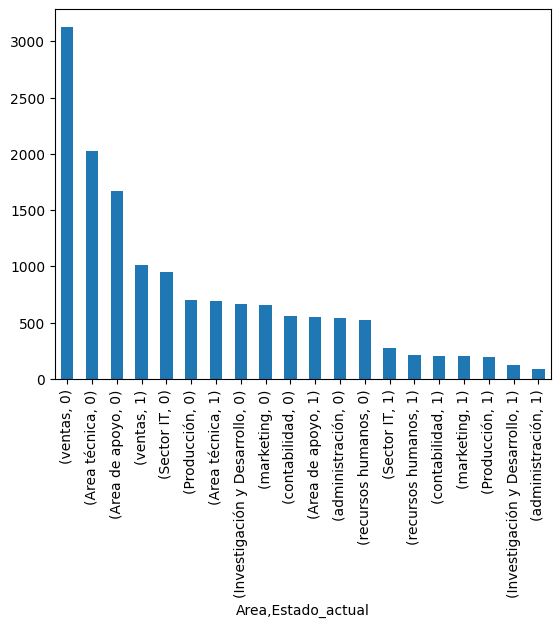

In [81]:
cant_estado_por_area.sort_values(ascending=False).plot.bar()

<Axes: xlabel='Motivo_salida,Estado_actual'>

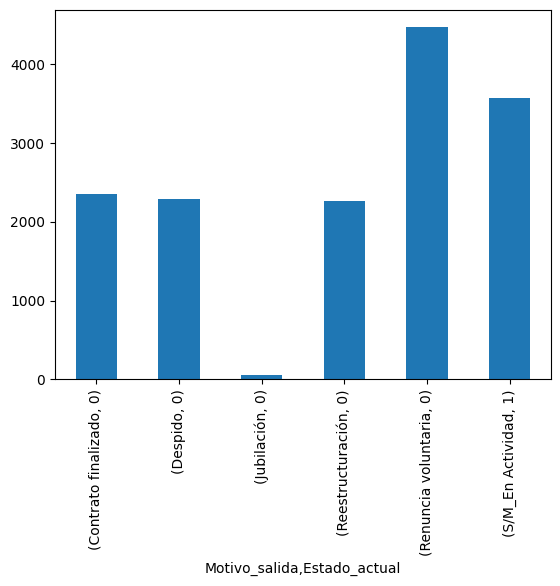

In [55]:
cant_inactivo_por_motivo.

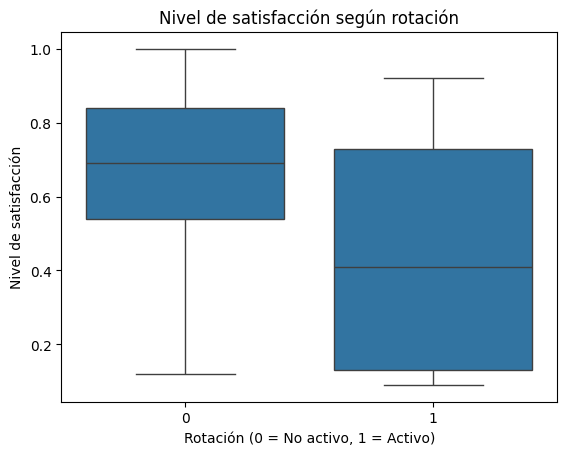

In [70]:
sns.boxplot(x='Estado_actual', y='Nivel_de_satisfacción', data=df)
plt.title('Nivel de satisfacción según rotación')
plt.xlabel('Rotación (0 = No activo, 1 = Activo)')
plt.ylabel('Nivel de satisfacción')
plt.show()

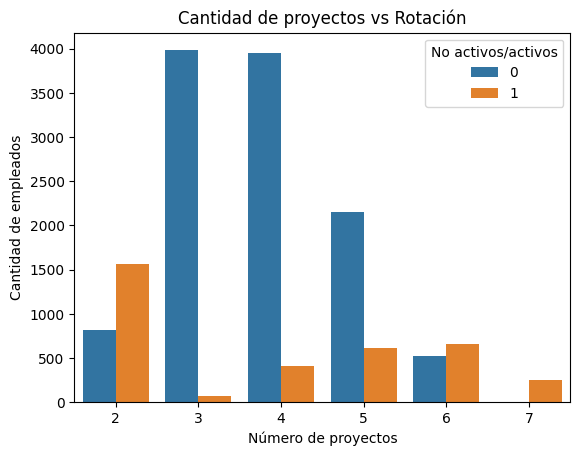

In [73]:
sns.countplot(x='Cantidad_proyectos', hue='Estado_actual', data=df)
plt.title('Cantidad de proyectos vs Rotación')
plt.xlabel('Número de proyectos')
plt.ylabel('Cantidad de empleados')
plt.legend(title='No activos/activos')
plt.show()

In [74]:
# Filtro para diferenciar los activos de los no activos sin ascenso
no_activos_sin_asc = df[(df['Estado_actual'] == 1) & (df['Ascenso_en_5años'] == 0)]

# Calcular proporción sobre los que se fueron
total_activos = df[df['Estado_actual'] == 1].shape[0]
proporcion = len(no_activos_sin_asc) / total_activos

print(f"Proporción de empleados que se fueron sin ascenso: {proporcion:.2%}")

Proporción de empleados que se fueron sin promoción: 99.47%


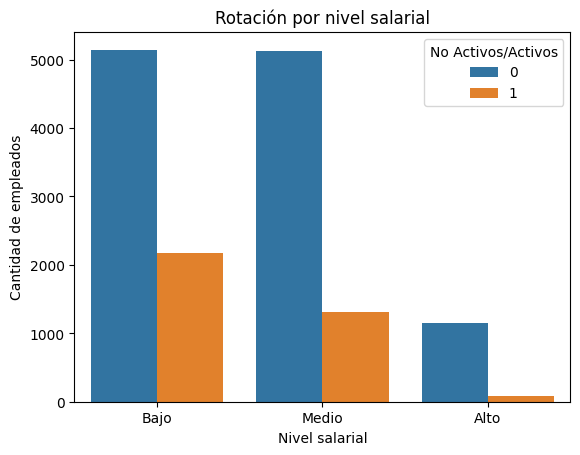

In [76]:
sns.countplot(x='Nivel_salario', hue='Estado_actual', data=df, order=['Bajo', 'Medio', 'Alto'])
plt.title('Rotación por nivel salarial')
plt.xlabel('Nivel salarial')
plt.ylabel('Cantidad de empleados')
plt.legend(title='No Activos/Activos')
plt.show()

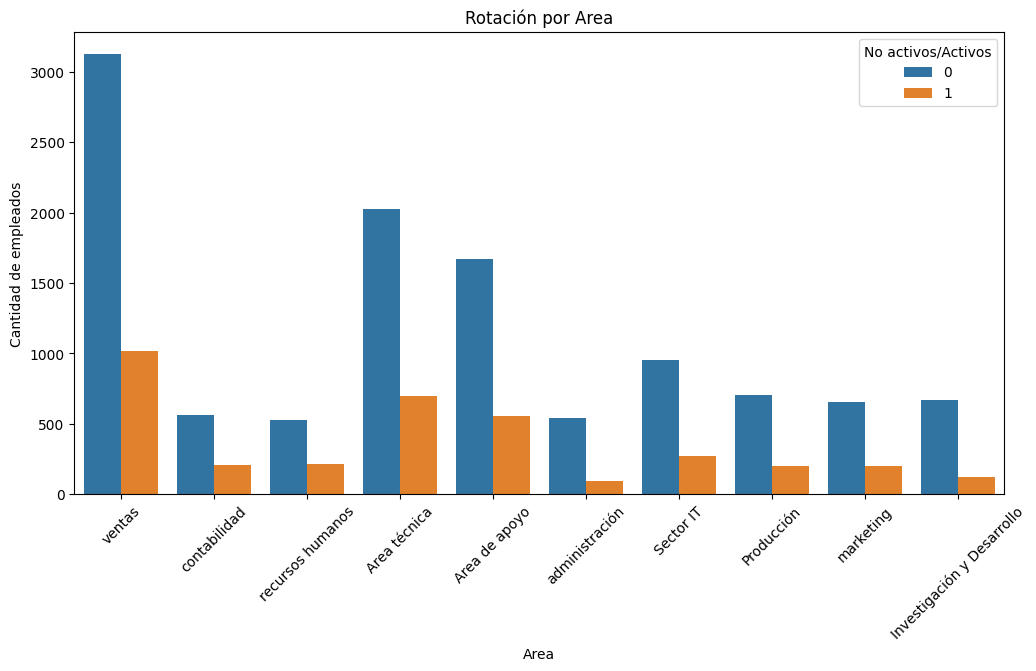

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x='Area', hue='Estado_actual', data=df)
plt.title('Rotación por Area')
plt.xlabel('Area')
plt.ylabel('Cantidad de empleados')
plt.legend(title='No activos/Activos')
plt.xticks(rotation=45)
plt.show()

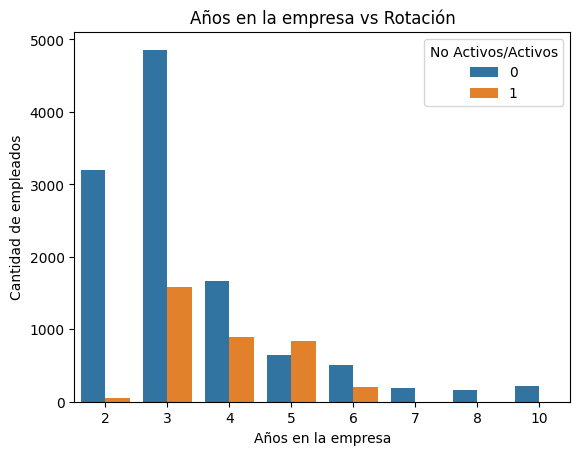

In [82]:
sns.countplot(x='Años_trayectoria', hue='Estado_actual', data=df)
plt.title('Años en la empresa vs Rotación')
plt.xlabel('Años en la empresa')
plt.ylabel('Cantidad de empleados')
plt.legend(title='No Activos/Activos')
plt.show()

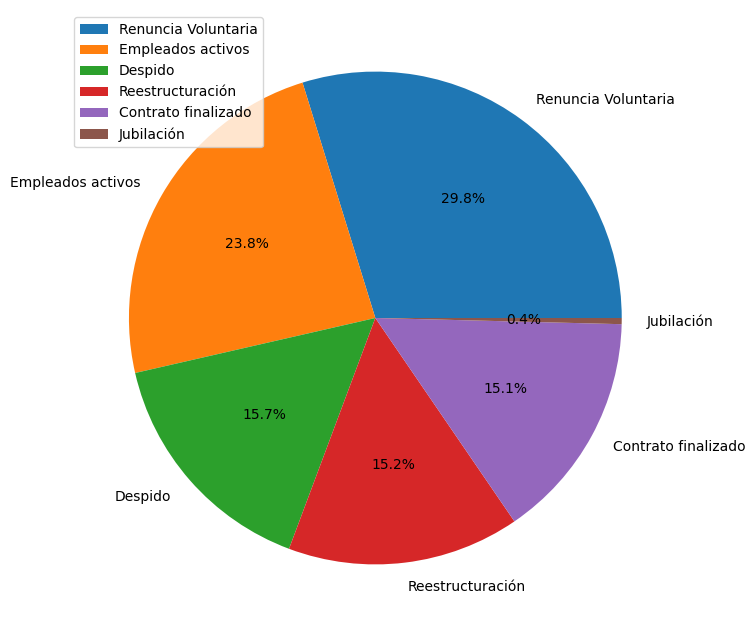

In [95]:
#Porcentajes de Motivo de Salida
cant_salidas = df['Motivo_salida'].value_counts()
fig,ax=plt.subplots(figsize=(8,8))

motivos = ['Renuncia Voluntaria','Empleados activos','Despido','Reestructuración','Contrato finalizado', 'Jubilación']

ax.pie(cant_salidas, labels=motivos, autopct='%1.1f%%')
ax.legend()
plt.show()

# Conclusión Parcial - Analisis Exploratorio

A partir del estudio exploratorio del dataset, se identificaron patrones relevantes y relaciones significativas entre variables que ayudan a comprender la dinámica de la rotación en la organización:

*  Desbalance en la variable objetivo:
La distribución de la variable "**Estado_actual**" revela un claro desbalance, con una mayoría de registros correspondientes a empleados desvinculados.

*  Patrones en desempeño y rotación:
 * Se observó la falta de reconocimiento (por ejemplo, casos de ningun **ascenso en cinco años**) también están asociadas a una mayor probabilidad de salida.
 * Algunas **áreas** del negocio presentan una rotación sistemáticamente más alta, lo que puede indicar problemas estructurales o de liderazgo específicos.

*  Patrones en motivos de salida:
Los **motivos de salida** registrados —como "Renuncia voluntaria" y "Contrato finalizado"— permiten clasificar las salidas en voluntarias vs. involuntarias, lo cual es crucial para análisis causales más profundos.